# GGS Data Visualization
Author: Matthew Learn (matt.learn@marine.rutgers.edu)<br><br>
Jupyter Notebook meant for visualizing Glider Guidance System (GGS) products.

In [1]:
from models import *
from functions import *
from pathfinding import *
from plotting import *

2025-01-17 15:00:11.331 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
date = "2025-01-17"
depth = 1000
lon_min = -70
lon_max = -65
lat_min = 34
lat_max = 39

dates = (date, date)
extent = (lat_min, lon_min, lat_max, lon_max)

# density = 4
scalar = 4

# waypoints = [(41.240, -70.958), (37.992, -71.248), (36.943, -66.862), (38.666, -62.978), (39.801, -60.653), (39.618, -55.87)]
waypoints = [(35, -67), (36.25, -66.75), (37.25, -67)]

Load and process data.

In [3]:
# load and preprocess CMEMS data

cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
cmems.subset_data = cmems.subset_data.isel(time=0)
cmems.z_interpolated_data = interpolate_depth(cmems)
cmems.z_interpolated_data = calculate_magnitude(cmems)
cmems.da_data = depth_average(cmems)
cmems_path = compute_a_star_path(waypoints, cmems.da_data)

Loading CMEMS data...
Start time (UTC): 2025-01-17 15:00:11.355078+00:00


INFO - 2025-01-17T15:00:11Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2025-01-17T15:00:11Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-01-17T15:00:14Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2025-01-17 15:00:19.968364+00:00
Runtime: 0:00:08.613286

CMEMS: Subsetted data.

CMEMS: Interpolating depth...
Start time (UTC): 2025-01-17 15:00:20.114771+00:00
Done.
End time (UTC): 2025-01-17 15:00:43.081370+00:00
Runtime: 0:00:22.966599

CMEMS: Calculating magnitude...
Start time (UTC): 2025-01-17 15:00:43.081370+00:00
Done.
End time (UTC): 2025-01-17 15:00:43.098847+00:00
Runtime: 0:00:00.017477

CMEMS: Depth averaging...
Start time (UTC): 2025-01-17 15:00:43.098847+00:00
Done.
End time (UTC): 2025-01-17 15:00:43.098847+00:00
Runtime: 0:00:00

CMEMS: Calculating A* optimal path...
Start time (UTC): 2025-01-17 15:00:43.164777+00:00
Segment 1: Start (35.0, -67.0) End (36.25, -66.75) Time 275521.8727907198 seconds Distance 140818.213910918 meters
Segment 2: Start (36.25, -66.75) End (37.25, -67.0) Time 107708.09556007678 seconds Distance 113403.71115497274 meters
Total mission time (adjusted): 383229.96835079655 seconds
Total mission distance: 254221.9250658907

In [4]:
# Load and preprocess ESPC data

espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
espc.subset_data = espc.subset_data.isel(time=0)
espc.z_interpolated_data = interpolate_depth(espc)
espc.z_interpolated_data = calculate_magnitude(espc)
espc.da_data = depth_average(espc)
espc_path = compute_a_star_path(waypoints, espc.da_data)

Loading ESPC data...
Start time (UTC): 2025-01-17 15:00:43.402797+00:00
Done.
End time (UTC): 2025-01-17 15:00:43.815380+00:00
Runtime: 0:00:00.412583

ESPC: Subsetted data.

ESPC: Interpolating depth...
Start time (UTC): 2025-01-17 15:00:43.835123+00:00
Done.
End time (UTC): 2025-01-17 15:00:47.404879+00:00
Runtime: 0:00:03.569756

ESPC: Calculating magnitude...
Start time (UTC): 2025-01-17 15:00:47.404879+00:00
Done.
End time (UTC): 2025-01-17 15:00:47.415481+00:00
Runtime: 0:00:00.010602

ESPC: Depth averaging...
Start time (UTC): 2025-01-17 15:00:47.415481+00:00
Done.
End time (UTC): 2025-01-17 15:00:47.417444+00:00
Runtime: 0:00:00.001963

ESPC: Calculating A* optimal path...
Start time (UTC): 2025-01-17 15:00:47.552198+00:00
Segment 1: Start (35.0, -67.0) End (36.25, -66.75) Time 285400.6090628754 seconds Distance 140884.12413037856 meters
Segment 2: Start (36.25, -66.75) End (37.25, -67.0) Time 119936.45696119156 seconds Distance 114794.00895419173 meters
Total mission time (adj

In [5]:
# Load and preprocess RTOFS data

rtofs = RTOFS()
rtofs.load('east')
rtofs.subset(dates, extent, depth)
rtofs.subset_data = rtofs.subset_data.isel(time=0)
rtofs.z_interpolated_data = interpolate_depth(rtofs)
rtofs.z_interpolated_data = calculate_magnitude(rtofs)
rtofs.da_data = depth_average(rtofs)

Loading RTOFS data...
Start time (UTC): 2025-01-17 15:00:48.340917+00:00
Model source: RTOFS (East Coast)
Done.
End time (UTC): 2025-01-17 15:01:17.189186+00:00
Runtime: 0:00:28.848269

RTOFS (East Coast): Subsetted data.

RTOFS (East Coast): Interpolating depth...
Start time (UTC): 2025-01-17 15:01:18.894928+00:00
Done.
End time (UTC): 2025-01-17 15:01:36.470972+00:00
Runtime: 0:00:17.576044

RTOFS (East Coast): Calculating magnitude...
Start time (UTC): 2025-01-17 15:01:36.470972+00:00
Done.
End time (UTC): 2025-01-17 15:01:36.482052+00:00
Runtime: 0:00:00.011080

RTOFS (East Coast): Depth averaging...
Start time (UTC): 2025-01-17 15:01:36.482052+00:00
Done.
End time (UTC): 2025-01-17 15:01:36.483533+00:00
Runtime: 0:00:00.001481



In [6]:
rtofs_da_regridded = regrid_ds(rtofs.da_data, cmems.da_data)
rtofs_path = compute_a_star_path(waypoints, rtofs_da_regridded)
rtofs_path

RTOFS (East Coast): Regridding to CMEMS...
Start time (UTC): 2025-01-17 15:01:36.490808+00:00
Done.
End time (UTC): 2025-01-17 15:01:39.033960+00:00
Runtime: 0:00:02.543152
RTOFS (East Coast): Calculating A* optimal path...
Start time (UTC): 2025-01-17 15:01:39.366888+00:00
Segment 1: Start (35.0, -67.0) End (36.25, -66.75) Time 260438.50808684 seconds Distance 140818.213910918 meters
Segment 2: Start (36.25, -66.75) End (37.25, -67.0) Time 108445.55607560306 seconds Distance 113403.71115497274 meters
Total mission time (adjusted): 368884.06416244304 seconds
Total mission distance: 254221.92506589077 meters
Done.
End time (UTC): 2025-01-17 15:01:39.615117+00:00
Runtime: 0:00:00.248229



[(35.0, -67.0),
 (35.083336, -67.0),
 (35.16667, -67.0),
 (35.25, -67.0),
 (35.333336, -67.0),
 (35.41667, -67.0),
 (35.5, -67.0),
 (35.583336, -67.0),
 (35.66667, -67.0),
 (35.75, -67.0),
 (35.833336, -67.0),
 (35.91667, -66.916664),
 (36.0, -66.916664),
 (36.083336, -66.83333),
 (36.16667, -66.83333),
 (36.25, -66.75),
 (36.333336, -66.75),
 (36.41667, -66.75),
 (36.5, -66.75),
 (36.583336, -66.75),
 (36.66667, -66.75),
 (36.75, -66.75),
 (36.833336, -66.75),
 (36.91667, -66.83333),
 (37.0, -66.83333),
 (37.083336, -66.916664),
 (37.16667, -66.916664),
 (37.25, -67.0)]

In [7]:
rmsd = calculate_rmsd(espc.z_interpolated_data, cmems.z_interpolated_data, regrid=True)

ESPC & CMEMS: Calculating RMSD...
Start time (UTC): 2025-01-17 15:01:39.633114+00:00
ESPC: Regridding to CMEMS...
Start time (UTC): 2025-01-17 15:01:39.633114+00:00
Done.
End time (UTC): 2025-01-17 15:01:39.783712+00:00
Runtime: 0:00:00.150598
Done.
End time (UTC): 2025-01-17 15:01:39.787975+00:00
Runtime: 0:00:00.154861



2025-01-17 15:01:39.798 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-17 15:01:39.799 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 15:01:40.565 
  command:

    streamlit run c:\Users\matth\miniconda3\envs\ggs01\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-17 15:01:40.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 15:01:40.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 15:01:40.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 15:01:40.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


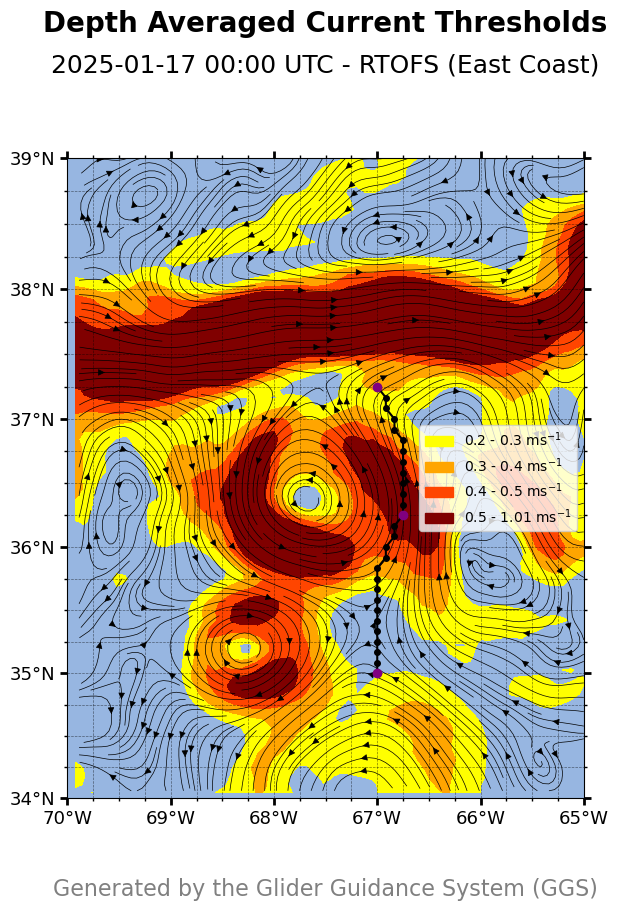

In [8]:
density = 3

# fig1, contourf1, legend1, cax1, quiver1, streamplot1, path_plot1, wp_plot1 = create_map(cmems.da_data, extent, "threshold", "streamplot", density=density, optimized_path=cmems_path, waypoints=waypoints)
# fig2, contourf2, legend2, cax2, quiver2, streamplot2, path_plot2, wp_plot2 = create_map(espc.da_data, extent, "threshold", "streamplot", density=density, optimized_path=espc_path, waypoints=waypoints)
fig3, contourf3, legend3, cax3, quiver3, streamplot3, path_plot3, wp_plot3 = create_map(rtofs.da_data, extent, "threshold", "streamplot", density=density, optimized_path=rtofs_path, waypoints=waypoints)
# fig4, contourf4, legend4, cax4, quiver4, streamplot4, path_plot4, wp_plot4 = create_map(rmsd, extent, "rmsd", None, optimized_path=cmems_path, waypoints=waypoints)
# fig4, contourf4, legend4, cax4, quiver4, streamplot4, path_plot5, wp_plot5 = create_map(rmsd, extent, "rmsd", None, optimized_path=espc_path, waypoints=waypoints)